### In this hands on you will be using Gated Recurrent Units to predict the airline passenger count in a given month based on the information from previous months.

- Follow the instructions provided for each cell and and code accordingly. 
- In order to run the cell press shift+enter.
- make sure you have run all the cells before submitting the hands on

### Run the below cell to import necessary packages

In [45]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

- Read data from air_line.csv file using pandas and assign the values of "passenger_count" column to variable **dataset**, 
- typecast passenger count values values to float32
### Expected output
[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]]

In [61]:
###Start code here
dataset = pandas.read_csv('air_line.csv', usecols=[1]).values
###End code
#dataset = dataset.astype('float32')
print(dataset[:10])

[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]]


Use MinMaxScaler to normalize the values of **dataset** between the range 0 to 1  
### Expected output
[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]

In [63]:
###Start code here
dataset = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset)
###End code
print(dataset[:10])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]]


### Train test split the dataset  
- Assign to first 100 values of dataset to variable **train** and remaining values to variable **test**
### Expected output:
100 44

In [64]:
###Start code here
train_size = 100
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
###End code
print(len(train), len(test))

100 44


### write a function to generate training dataset 
    - parameters: dataset: orginal dataset
                  look_back: the window size that tells the number of previous values in the series to look for to                   predict the next one.
    - returns: feature and target arrays

example: 
         for window size 1:
         dataset = [1,2,3,4]  
         feature = [[1],[2],[3]]    
         target = [2,3,4]  
         
         for window size 2:
         feature = [[1,2],[2,3]]  
         target = [3,4]  

In [65]:
###Start code
def generate_dataset(dataset, look_back=2):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]

        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])

    return numpy.array(dataX), numpy.array(dataY)
###End code

### the below cell uses the method you defined above to generate feature and target datasets on train and teat data
### Expected output:
(98, 1)  
(98,)  
(42, 1)  
(42,)  
[[0.01544401]  
 [0.02702703]]  
[0.02702703 0.05405405]  

In [71]:
look_back = 1
trainX, trainY = generate_dataset(train, look_back)
testX, testY = generate_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(trainX[:2])
print(trainY[:2])

(98, 1)
(98,)
(42, 1)
(42,)
[[0.01544402]
 [0.02702703]]
[0.02702703 0.05405405]


### Reshape the trainX and testX dataset to (number of samples, 1, look_back)

### Expected output:
(98, 1, 1)  
(98,)  
(42, 1, 1)  
(42,)  

In [72]:
###Start code here
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
###End code
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(98, 1, 1)
(98,)
(42, 1, 1)
(42,)


#### Using keras Sequential() class create a model having one GRU block and one dense layer
### compile the model with mean_squared_error loss adam optimizer

### Expected output
<img src = summary.png/>

In [73]:
numpy.random.seed(51)
###Start code here
model = Sequential()
model.add(GRU(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
###End code
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 4)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


### Run model.fit() on train data for 30 epoches and batch_size = 1

In [74]:
###Start code
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)
###End code

Epoch 1/30
 - 1s - loss: 0.0598
Epoch 2/30
 - 0s - loss: 0.0282
Epoch 3/30
 - 0s - loss: 0.0217
Epoch 4/30
 - 0s - loss: 0.0197
Epoch 5/30
 - 0s - loss: 0.0183
Epoch 6/30
 - 0s - loss: 0.0168
Epoch 7/30
 - 0s - loss: 0.0154
Epoch 8/30
 - 0s - loss: 0.0141
Epoch 9/30
 - 0s - loss: 0.0128
Epoch 10/30
 - 0s - loss: 0.0116
Epoch 11/30
 - 0s - loss: 0.0104
Epoch 12/30
 - 0s - loss: 0.0094
Epoch 13/30
 - 0s - loss: 0.0084
Epoch 14/30
 - 0s - loss: 0.0072
Epoch 15/30
 - 0s - loss: 0.0064
Epoch 16/30
 - 0s - loss: 0.0056
Epoch 17/30
 - 0s - loss: 0.0049
Epoch 18/30
 - 0s - loss: 0.0042
Epoch 19/30
 - 0s - loss: 0.0037
Epoch 20/30
 - 0s - loss: 0.0033
Epoch 21/30
 - 0s - loss: 0.0029
Epoch 22/30
 - 0s - loss: 0.0027
Epoch 23/30
 - 0s - loss: 0.0025
Epoch 24/30
 - 0s - loss: 0.0024
Epoch 25/30
 - 0s - loss: 0.0023
Epoch 26/30
 - 0s - loss: 0.0022
Epoch 27/30
 - 0s - loss: 0.0023
Epoch 28/30
 - 0s - loss: 0.0022
Epoch 29/30
 - 0s - loss: 0.0022
Epoch 30/30
 - 0s - loss: 0.0021


#### using model.predict assign the predicted output on trainX and test X to trainPredicy and testPredict variables respectively
#### since the data was normalized previously invert the values to their original form (hint: use .invert_transform())

In [75]:
###Start code here
trainPredict = model.predict(trainX)

testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
###End code
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.56 RMSE
Test Score: 49.27 RMSE


In [88]:
with open("output.txt", "w+") as file:
    file.write("train score {0:.2f}\n".format(trainScore))
    file.write("test score {0:.2f}".format(testScore))

### Run the below cell to plot the train as well as predicted passenger counts.
### you can observe that the predicted results follow the same trend as of train data.

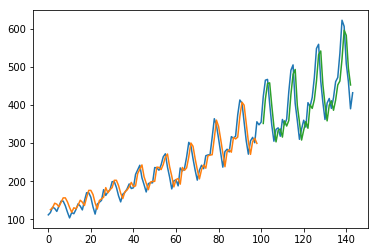

In [76]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()